# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

/home/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


name  population
0        Dade       12345
1     Broward       40000
2  Palm Beach       60000
3      Summit        1234
4    Cuyahoga        1337

In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

/home/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


name  population    state shortname info.governor
0        Dade       12345  Florida        FL    Rick Scott
1     Broward       40000  Florida        FL    Rick Scott
2  Palm Beach       60000  Florida        FL    Rick Scott
3      Summit        1234     Ohio        OH   John Kasich
4    Cuyahoga        1337     Ohio        OH   John Kasich

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

_id  approvalfy board_approval_month  \
0  {'$oid': '52b213b38594d8a2be17c780'}        1999             November   
1  {'$oid': '52b213b38594d8a2be17c781'}        2015             November   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Republic of Ethiopia!$!ET   
1                   NaN                      Republic of Tunisia!$!TN   

  countrycode                              countryname countryshortname  ...  \
0          ET  Federal Democratic Republic of Ethiopia         Ethiopia  ...   
1          TN                      Republic of Tunisia          Tunisia  ...   

    sectorcode source  status  supplementprojectflg  \
0  ET,BS,ES,EP   IBRD  Active                     N   
1        BZ,BS   IBRD  Active                     N   

                                              theme1  \
0      {'Name': 'Education for all', 'Percent': 100}   
1  {'Name': 'Other economic management', 'Percent...   

                                      theme_namecode themecode   totalamt  \
0      [{'name': 'Education for all', 'code': '65'}]        65  130000000   
1  [{'name': 'Other economic management', 'code':...     54,24          0   

  totalcommamt                                                url  
0    130000000  http://www.worldbank.org/projects/P129828/ethi...  
1      4700000  http://www.worldbank.org/projects/P144674?lang=en  

[2 rows x 50 columns]

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# Solutions to the questions:

In [8]:
#imports

%matplotlib inline
import pandas as pd
import json
import matplotlib.pyplot as plt

In [9]:
json_df = pd.read_json('data/world_bank_projects.json')    #loading the data into a dataframe
#json_df.info()                                            # basic overview of the df to understand it

In [10]:
print(json_df['project_name'].describe(),'\n\n')           #understanding the project and countries columns
print(json_df['countryname'].describe())


count                                                   500
unique                                                  500
top       AusAid TA for Vietnam Rural Water Supply and S...
freq                                                      1
Name: project_name, dtype: object 


count                            500
unique                           118
top       People's Republic of China
freq                              19
Name: countryname, dtype: object


From the immediately preceeding .describe() commands, we understand that countries are repeated in the rows whereas each project is unique. So grouping by country and counting the projects will solve Qn.1:

## Solution to Qn-1:
10 countries with most projects:

In [11]:
result_Q1 = json_df.groupby('countryname')['project_name'].count().sort_values(ascending=False).head(10)
result_Q1

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

The top 10 countries by count of projects are shown above.

## Solution to Qn-2:

Finding top10 major project themes.

In [12]:
#Exploring the concernced column. There are missing values for key "name":
print(json_df['mjtheme_namecode'][0])
print(json_df['mjtheme_namecode'][5])

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]
[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}]


<b>NOTE</b>:
The missing values in "name" occur across different theme "codes" ("code"s themselves have no missing values).

In Solution 2 (all methods) we will ignore the fact that there are missing values and we'll only consider counts of non-missing theme names. Solution 3 will show the neccessary steps to handle the missing "name" values.


-----------------------------------------------------------------------------------------------------------------

## Method-I:

Each row in column 'mjtheme_namecode' contains a list of dictionaries.
Each dictionary has the same keys.
We are interested in the key 'name' and counting its different values.
Finally we'll sort the counts in descending order.

In [13]:
theme_counts={}

for list in json_df.mjtheme_namecode:
    for dict in list:
        for key, value in dict.items():
            if key == 'name' and value in theme_counts:
                theme_counts[value]+=1
            elif key == 'name':
                theme_counts[value]=1

In [14]:
#Sorting 'theme_counts' by values (descending order)
sorted_counts = sorted(  ((value,key) for key, value in theme_counts.items()) , reverse=True )

for i in sorted_counts[:10]:
    print(i[0], i[1])


223 Environment and natural resources management
202 Rural development
197 Human development
184 Public sector governance
158 Social protection and risk management
130 Financial and private sector development
122 
119 Social dev/gender/inclusion
72 Trade and integration
47 Urban development


The above list shows the top 10 project themes and their respective counts. It is seen to include 122 missing theme-names which needs further checks (done in Solution 3).

## Method-II

The same code as above can be run with the change of using "code" not "name" to aggregate the counts.

In [15]:
theme_counts={}

for list in json_df.mjtheme_namecode:
    for dict in list:
        for key, value in dict.items():
            if key == 'code' and value in theme_counts:
                theme_counts[value]+=1
            elif key == 'code':
                theme_counts[value]=1

In [16]:
#Sorting 'theme_counts' by values (descending order)
sorted_counts = sorted(  ((value,key) for key, value in theme_counts.items()) , reverse=True )

for i in sorted_counts[:10]:
    print(i[0], i[1])


250 11
216 10
210 8
199 2
168 6
146 4
130 7
77 5
50 9
38 1


The <b>advantage over Method-I</b> is that since none of the "code"s are missing <b>this results in corrected total counts</b>. The <b>con of this method is the unreadability of the output as the "name" key is not used</b>.(Further sections solve both these problems).

## Method-III

In [17]:
import json
json_str = json.load((open('data/world_bank_projects.json')))   #importing json as str instead of as dataframe.

In [18]:
#normalizing required column
df = pd.json_normalize((json_str), 'mjtheme_namecode')
df.head()

code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration

In [19]:
# Getting the required counts using groupby (for better readability, we will first duplicate the "name" column)
df['name_copy']=df['name']
interim_result = pd.DataFrame(df.groupby(['code','name'])['name_copy'].count())
interim_result.columns = ['count']
interim_result

count
code name                                               
1                                                      5
     Economic management                              33
10                                                    14
     Rural development                               202
11                                                    27
     Environment and natural resources management    223
2                                                     15
     Public sector governance                        184
3                                                      3
     Rule of law                                      12
4                                                     16
     Financial and private sector development        130
5                                                      5
     Trade and integration                            72
6                                                     10
     Social protection and risk management           158
7                                                     11
     Social dev/gender/inclusion                     119
8                                                     13
     Human development                               197
9                                                      3
     Urban development                                47

The above interim result :  
(1) Can get us the top-10 counts as-is ignoring missing theme "name", thus answering Qn 2 again.

(2) Can be tweaked as seen in Solution to Qn-3 to get the correct total counts by not ignoring missing "name"s.

So the answer to Qn-2, once again, is gotten by:

In [20]:
result_sorted = interim_result.sort_values('count', ascending=False)

result_Q2 = result_sorted[:10] ; print(result_Q2)

                                                   count
code name                                               
11   Environment and natural resources management    223
10   Rural development                               202
8    Human development                               197
2    Public sector governance                        184
6    Social protection and risk management           158
4    Financial and private sector development        130
7    Social dev/gender/inclusion                     119
5    Trade and integration                            72
9    Urban development                                47
1    Economic management                              33


## Solution to Qn-3:
Finding top10 major project themes without ignoring blank theme "names"

In [21]:
# Uses "interim_result" calculated above.
# Fill missing theme "name"s using backward
interim_result=interim_result.reset_index().replace('',method='bfill')
interim_result.head(7)


code                                          name  count
0    1                           Economic management      5
1    1                           Economic management     33
2   10                             Rural development     14
3   10                             Rural development    202
4   11  Environment and natural resources management     27
5   11  Environment and natural resources management    223
6    2                      Public sector governance     15

In [22]:
# Calculate corrected counts, sort them, select top-10 as final result.
result = interim_result.groupby(['code','name'])['count'].sum()
result_Q3 = result.sort_values(ascending = False)[:10] ; result_Q3

code  name                                        
11    Environment and natural resources management    250
10    Rural development                               216
8     Human development                               210
2     Public sector governance                        199
6     Social protection and risk management           168
4     Financial and private sector development        146
7     Social dev/gender/inclusion                     130
5     Trade and integration                            77
9     Urban development                                50
1     Economic management                              38
Name: count, dtype: int64

<b>So the final answer to  - "top 10 themes with corrected counts by not ignoring blank theme names" is as above!</b>

To compare using visualization, we can plot unsorted counts as done below.

Environmental, Rural Development and Human Development projects were the top three themes.

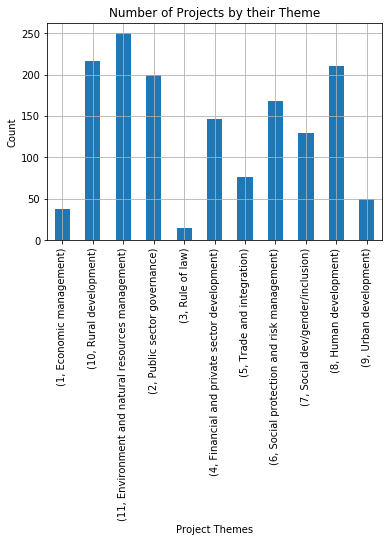

In [23]:
result.plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Project Themes')
plt.title('Number of Projects by their Theme')
plt.grid()
plt.show()
